In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
agData = pd.read_csv('../shared_data_read_only/Agriculture Dataset.csv')
agData.drop(columns=['Unnamed: 0'], inplace = True)

In [32]:
intensity = [col for col in agData.columns if ('CO2eq/kg') in col]
prodTon = [col for col in agData.columns if ('Production-tonnes') in col]
EnvImpactDF = agData.drop(columns = ['Area Code', 'GDP  (2015 US$, mil)', 'Standard Deviation °C']+prodTon+intensity)
EnvImpactDF.columns

Index(['Area', 'Year', 'Population', 'Temperature change °C',
       'Farm-gate emissions - Emissions (CO2eq) (AR5) - kilotonnes',
       'Food Transport - Emissions (CO2eq) (AR5) - kilotonnes',
       'Waste - Emissions (CO2eq) (AR5) - kilotonnes',
       'Cereals excluding rice-Emissions (CO2eq)-kilotonnes',
       'Eggs, hen, in shell-Emissions (CO2eq)-kilotonnes',
       'Meat, buffalo-Emissions (CO2eq)-kilotonnes',
       'Meat, cattle-Emissions (CO2eq)-kilotonnes',
       'Meat, chicken-Emissions (CO2eq)-kilotonnes',
       'Meat, goat-Emissions (CO2eq)-kilotonnes',
       'Meat, pig-Emissions (CO2eq)-kilotonnes',
       'Meat, sheep-Emissions (CO2eq)-kilotonnes',
       'Milk, whole fresh buffalo-Emissions (CO2eq)-kilotonnes',
       'Milk, whole fresh camel-Emissions (CO2eq)-kilotonnes',
       'Milk, whole fresh cow-Emissions (CO2eq)-kilotonnes',
       'Milk, whole fresh goat-Emissions (CO2eq)-kilotonnes',
       'Milk, whole fresh sheep-Emissions (CO2eq)-kilotonnes',
       

In [46]:
prodTon = [col for col in agData.columns if ('kilotonnes') in col]

EnvImpactDF = EnvImpactDF[EnvImpactDF.Year >= 2012]
EnvImpactDF['Sum CO2eq-kilotonnes'] = EnvImpactDF[prodTon].sum(axis=1)

EnvImpactDF.drop(columns = prodTon, inplace = True)
EnvImpactDF.drop(columns = ['Year'], inplace = True)
EnvImpactDF

,Area,Population,Temperature change °C,Sum CO2eq-kilotonnes
51,Afghanistan,31161376.0,0.283,3.521590e+04
52,Afghanistan,32269589.0,1.325,3.491213e+04
53,Afghanistan,33370794.0,0.536,3.575872e+04
54,Afghanistan,34413603.0,1.166,3.408374e+04
55,Afghanistan,35383032.0,1.581,3.413832e+04
...,...,...,...,...
13618,OECD,NaN,0.992,3.328055e+06
13619,OECD,NaN,0.828,3.338970e+06
13620,OECD,NaN,1.292,3.328725e+06
13621,OECD,NaN,1.872,3.319597e+06


In [13]:
tempSum = EnvImpactDF['Temperature change °C'].sum()
CO2Sum = EnvImpactDF['Sum CO2eq-kilotonnes'].sum()

In [14]:
df_new = EnvImpactDF.groupby('Area').sum()
df_new['CO2 ratio'] = (df_new['Sum CO2eq-kilotonnes']/CO2Sum)
df_new

,Population,Temperature change °C,Sum CO2eq-kilotonnes,CO2 ratio
Area,,,,
Afghanistan,2.028945e+08,6.517,2.080689e+05,3.954966e-04
Africa,7.009523e+09,6.736,1.220077e+07,2.319118e-02
Albania,1.737531e+07,8.978,4.310175e+04,8.192763e-05
Algeria,2.361163e+08,8.574,2.763024e+05,5.251944e-04
American Samoa,3.343440e+05,5.768,2.751090e+01,5.229261e-08
...,...,...,...,...
Western Sahara,3.133206e+06,9.940,3.511414e+02,6.674481e-07
World,4.402338e+10,7.693,8.592409e+07,1.633242e-01
Yemen,1.569447e+08,0.000,1.351396e+05,2.568728e-04


In [30]:
print(CO2Sum)
print(df_new['Sum CO2eq-kilotonnes'].sum())

526095406.6062
526095406.6061999


In [15]:
df_new['Temperature ratio'] = (df_new['Temperature change °C']/tempSum)
df_new

,Population,Temperature change °C,Sum CO2eq-kilotonnes,CO2 ratio,Temperature ratio
Area,,,,,
Afghanistan,2.028945e+08,6.517,2.080689e+05,3.954966e-04,0.003845
Africa,7.009523e+09,6.736,1.220077e+07,2.319118e-02,0.003974
Albania,1.737531e+07,8.978,4.310175e+04,8.192763e-05,0.005297
Algeria,2.361163e+08,8.574,2.763024e+05,5.251944e-04,0.005059
American Samoa,3.343440e+05,5.768,2.751090e+01,5.229261e-08,0.003403
...,...,...,...,...,...
Western Sahara,3.133206e+06,9.940,3.511414e+02,6.674481e-07,0.005865
World,4.402338e+10,7.693,8.592409e+07,1.633242e-01,0.004539
Yemen,1.569447e+08,0.000,1.351396e+05,2.568728e-04,0.000000


In [51]:
largeTemp = df_new.nlargest(4,'Temperature ratio')
largeCO2 = df_new.nlargest(4,'CO2 ratio')
smallTemp = df_new.nsmallest(4,'Temperature ratio')
smallCO2 = df_new.nsmallest(4,'CO2 ratio')

In [52]:
largeTemp

,Population,Temperature change °C,Sum CO2eq-kilotonnes,CO2 ratio,Temperature ratio
Area,,,,,
Finland,3.280537e+07,11.907,1.927102e+05,0.000366,0.007025
Slovenia,1.241022e+07,11.858,2.708311e+04,0.000051,0.006996
Russian Federation,8.687747e+08,11.768,2.043497e+06,0.003884,0.006943
Eastern Europe,1.766301e+09,11.639,4.179707e+06,0.007945,0.006867


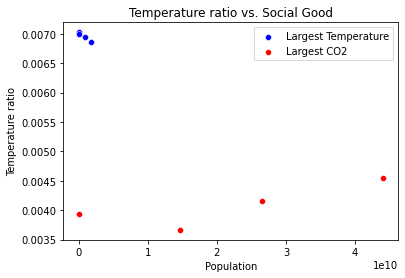

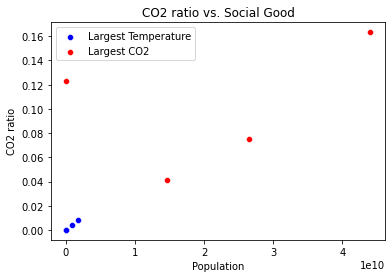

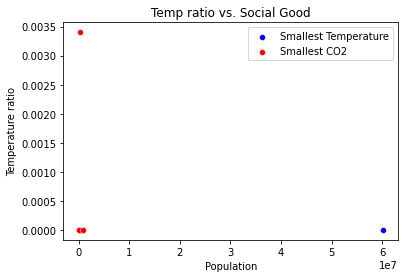

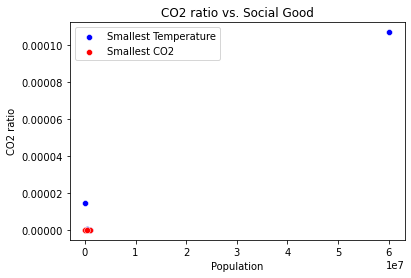

In [60]:
#population is temp value, replace with Social Good

fig = plt.figure()

sns.scatterplot(data = largeTemp, x = "Population", y = "Temperature ratio", color = 'blue')
sns.scatterplot(data = largeCO2, x = "Population", y = "Temperature ratio", color = 'red') 
plt.legend ( labels = ["Largest Temperature", "Largest CO2"])
plt.title ("Temperature ratio vs. Social Good")
plt.show()

fig = plt.figure()

sns.scatterplot(data = largeTemp, x = "Population", y = "CO2 ratio", color = 'blue')
sns.scatterplot(data = largeCO2, x = "Population", y = "CO2 ratio", color = 'red') 
plt.legend ( labels = ["Largest Temperature", "Largest CO2"])
plt.title ("CO2 ratio vs. Social Good")

plt.show()

fig = plt.figure()

sns.scatterplot(data = smallTemp, x = "Population", y = "Temperature ratio", color = 'blue')
sns.scatterplot(data = smallCO2, x = "Population", y = "Temperature ratio", color = 'red') 
plt.legend ( labels = ["Smallest Temperature", "Smallest CO2"])
plt.title ("Temp ratio vs. Social Good")
plt.show()

sns.scatterplot(data = smallTemp, x = "Population", y = "CO2 ratio", color = 'blue')
sns.scatterplot(data = smallCO2, x = "Population", y = "CO2 ratio", color = 'red') 
plt.legend ( labels = ["Smallest Temperature", "Smallest CO2"])
plt.title ("CO2 ratio vs. Social Good")
plt.show()
 